In [ ]:
import pandas as pd

# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'utf-16', 'utf-32']

for encoding in encodings:
    try:
        df = pd.read_csv('/content/spam.csv', encoding=encoding)
        print("File read successfully using encoding:", encoding)
        break  # Break the loop if file is read successfully
    except UnicodeDecodeError:
        print("Failed to read with encoding:", encoding)

# Display the DataFrame



Failed to read with encoding: utf-8
File read successfully using encoding: latin1


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF vectorization
tfidf = TfidfVectorizer()
X=tfidf.fit_transform(df['v2'])
y=df.v1

In [ ]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display class distribution before applying ADASYN
print("Class distribution before ADASYN:", Counter(y_train))

# Apply ADASYN to the training set
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Display class distribution after applying ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampled))


Class distribution before ADASYN: Counter({'ham': 3623, 'spam': 556})
Class distribution after ADASYN: Counter({'spam': 3657, 'ham': 3623})


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np

# Apply Laplace smoothing parameter (alpha) in Multinomial Naive Bayes
alpha = 1.0  # Laplace smoothing parameter
clf = MultinomialNB(alpha=alpha)

# Train the classifier
clf.fit(X_train_resampled, y_train_resampled)

# Evaluate the classifier on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy of Naive Bayes with Laplace smoothing: {accuracy:.2f}")

Accuracy of Naive Bayes with Laplace smoothing: 0.97


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
preds=clf.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.98      1202
        spam       0.90      0.91      0.90       191

    accuracy                           0.97      1393
   macro avg       0.94      0.95      0.94      1393
weighted avg       0.97      0.97      0.97      1393



<Axes: >

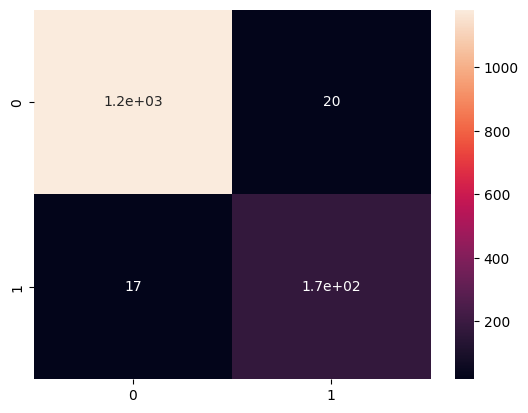

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,preds),annot=True)

In [ ]:
y_test.shape

(1393,)

In [ ]:
preds.shape

(1393,)

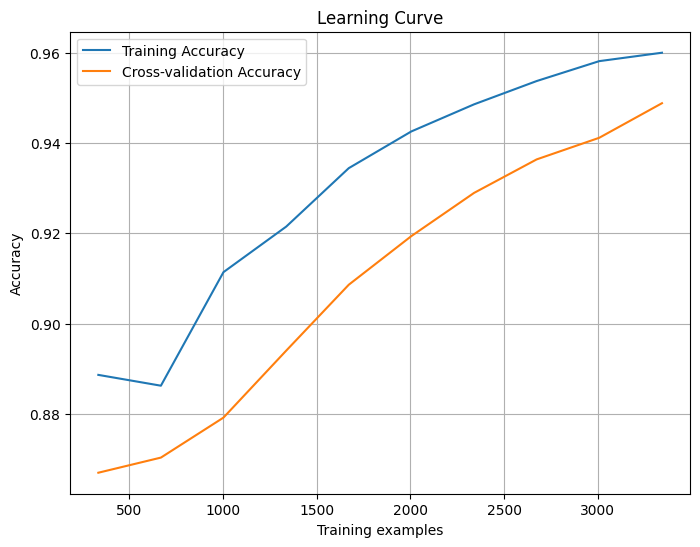

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assuming gb is your GaussianNB model
train_sizes, train_scores, valid_scores = learning_curve(
    clf, X_train.toarray(), y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")

plt.plot(train_sizes, train_scores_mean, label="Training Accuracy")
plt.plot(train_sizes, valid_scores_mean, label="Cross-validation Accuracy")
plt.legend()
plt.grid()
plt.show()
